In [2]:
# python notebook for Make Your Own Network
# code for a 3-layer neural network , and code for learning the MINST dataset

In [1]:
#a useful array module 
import numpy as np
#scipy.special for the sigmoid function expit()
import scipy.special
#library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook,not an external window
%matplotlib inline

In [3]:
#neural network class definition
class neuralNetwork :
    
    #initialise the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learninggrate):
        
         ##activation function is the sigmoid function
        self.activation_function=lambda x:scipy.special.expit(x)
        
        #set number of nodes in each input,hidden,output layer
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        #learning rate
        self.lr=learninggrate
    
        #link weight matrices,wih and who
        #weights inside the arrays are w_i_j,where link is from node
        #i to node j in the next layer
        #w11 w21 etc
        self.wih=(np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes)))
        self.who=(np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes)))
        pass
        
    
    #train the neural network
    def train(self,inputs_list,targets_list):
        #convert inputs_list to 2d array
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih,inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = np.dot(self.who,hidden_outputs)
        #calculate the signals emerging from hidden layer
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target - actual)
        ##输出层的误差
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_errors,split by weights,recombined at hidden nodes
        ##误差的反向传播
        hidden_errors = np.dot(self.who.T,output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
        
    
    #query the neural network
    def query(self,inputs_list):
        ##convert inputs list to 2d array
        inputs = np.array(inputs_list,ndmin=2).T
        
        ##calculate signal into hidden layer
        hidden_inputs=np.dot(self.wih,inputs)
        ##calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        ##calculate signals into final output layer
        final_inputs = np.dot(self.who,hidden_outputs)
        ##calculate the signals emerging from final output layer
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
    
        
    

In [4]:
#number of input,hidden and output nodes
input_nodes= 784
hidden_nodes= 200
output_nodes= 10

#learning rate is 0.1
learning_rate = 0.1

#create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

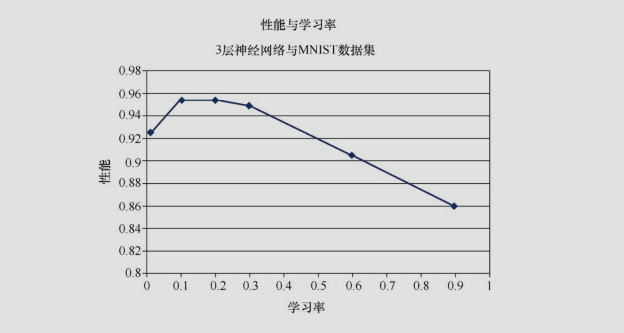

In [6]:
#load the minst training data csv file into a list
training_data_file = open("mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
#train the neural network
#epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    #go througth all records in the training data set is used for training
    for record in training_data_list:
        #split the record by the "," commas
        all_values = record.split(",")
        #scale and shift the inputs
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        #create the target output values (all 0.01 ,except the desired label which is 0.99)
        targets = np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass


In [8]:
#load the minst test data csv file into a list
test_data_file = open("mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
#test the neural network

#scorecard for how well the network performs,initially empty
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    #split the record by the "," commas
    all_values = record.split(",")
    #correct answer is the first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    if(label == correct_label):
        #network's answer matches correct answer,add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't matches correct answer,add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [10]:
#calculate the performance score,the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.9594


In [9]:
%whos

Variable             Type             Data/Info
-----------------------------------------------
all_values           list             n=785
e                    int              0
epochs               int              1
hidden_nodes         int              200
input_nodes          int              784
inputs               ndarray          784: 784 elems, type `float64`, 6272 bytes
learning_rate        float            0.1
matplotlib           module           <module 'matplotlib' from<...>matplotlib\\__init__.py'>
n                    neuralNetwork    <__main__.neuralNetwork o<...>ct at 0x00000230D193C940>
neuralNetwork        type             <class '__main__.neuralNetwork'>
np                   module           <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
output_nodes         int              10
record               str              8,0,0,0,0,0,0,0,0,0,0,0,0<...>0,0,0,0,0,0,0,0,0,0,0,0\n
scipy                module           <module 'scipy' from 'C:\<...>ges\\scipy\\__ini

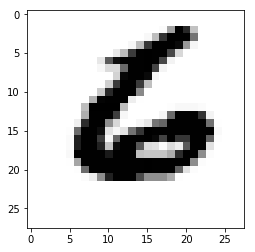

In [13]:
all_values = record.split(',')
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

In [15]:
record

'6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,117,254,220,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,95,212,253,253,253,157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,95,209,253,253,253,245,125,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,96,206,253,254,253,253,198,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,182,240,253,253,253,254,253,198,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,60,60,168,253,253,254,200,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,247,253,253,245,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,207,253,253,207,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,219,253,253,253,138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,250,253,253,253,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,254,254,254,254,94,0,0,0,0,0,3,13,13,13,8,0,0,0,0,0,0,0,0,0,0,0,0,107,253,253,253,204,15,0,0,0,0,21,166,253,253,253,212,25,0,0,0,0,0,0,0,0,0,0,33,217,253,253,132,64,0,0,18,43,157,171,25

In [18]:
all_values = record.split(",")
#scale and shift the inputs
inputs_test = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
#create the target output values (all 0.01 ,except the desired label which is 0.99)
outputs_test = n.query(inputs_test)
outputs

array([[0.02545281],
       [0.03167054],
       [0.01940782],
       [0.0046478 ],
       [0.01542783],
       [0.00440923],
       [0.98525289],
       [0.00458732],
       [0.00142546],
       [0.00560376]])